In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

In [32]:
PATH = '/home/jyw5hw/MLSystemsData/all_imgs/'
os.chdir(PATH)

In [33]:
dog = imread('E-147_2_19969_8193.jpg')


In [34]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df
df_doggo = image_to_pandas(dog)
df_doggo.head(10)

,Red_Channel,Green_Channel,Blue_Channel
0,197,74,141
1,193,70,137
2,203,82,151
3,217,96,165
4,211,92,160
5,199,82,152
6,186,71,140
7,172,58,128
8,180,69,138
9,175,65,136


/usr/local/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


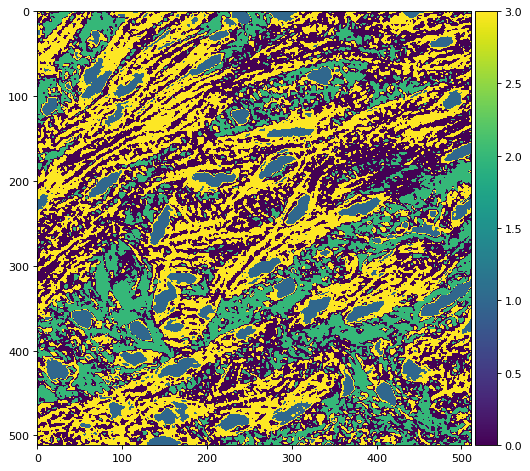

In [35]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=  4, random_state = 42).fit(df_doggo)
result = kmeans.labels_.reshape(dog.shape[0],dog.shape[1])
imshow(result, cmap='viridis')
plt.show()

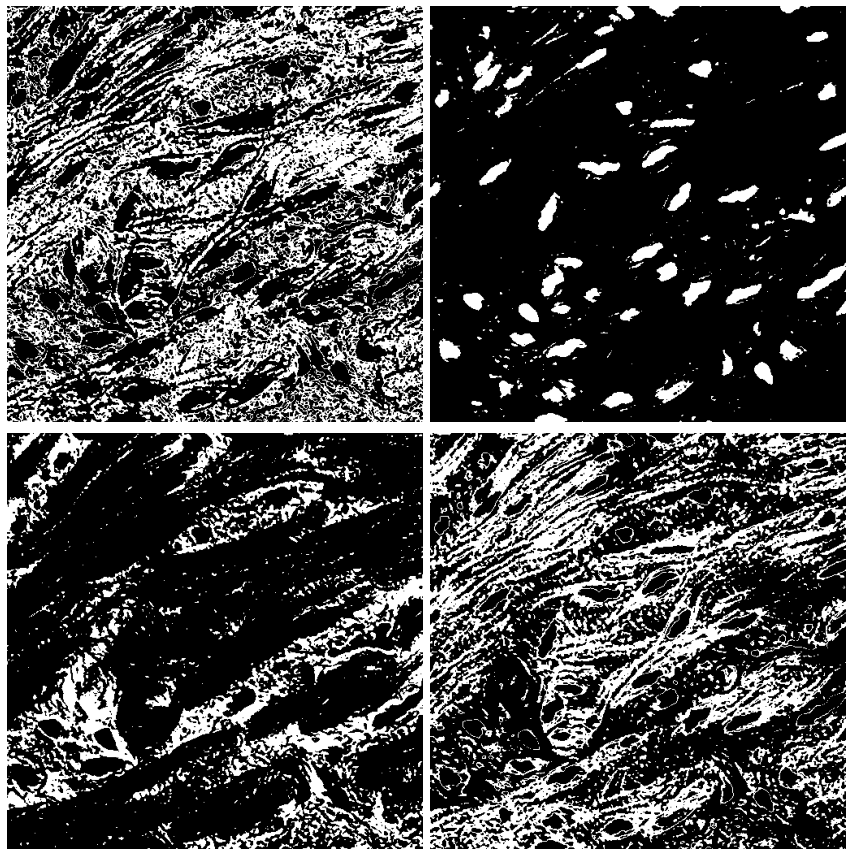

In [36]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
for n, ax in enumerate(axes.flatten()):
    ax.imshow(result==[n], cmap='gray');
    ax.set_axis_off()
    
fig.tight_layout()

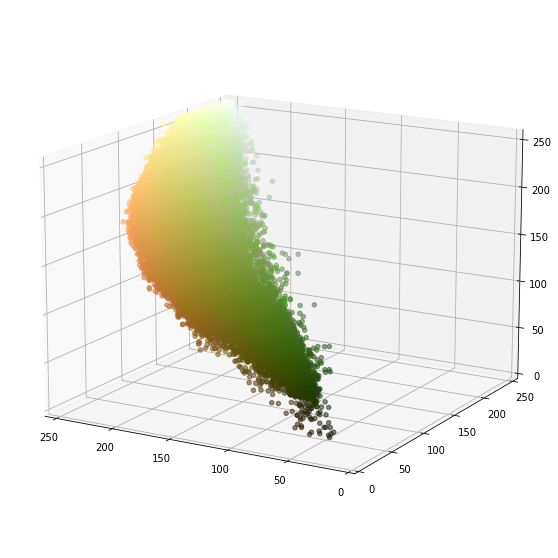

In [37]:
def pixel_plotter(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    color_list = list(zip(df['Red_Channel'].to_list(),
                          df['Blue_Channel'].to_list(),
                          df['Green_Channel'].to_list()))
    norm = colors.Normalize(vmin=0,vmax=1.)
    norm.autoscale(color_list)
    p_color = norm(color_list).tolist()
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, 
                    c = p_color, alpha = 0.55);
    
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    
    
    ax_3d.view_init(-165, 60)
pixel_plotter(df_doggo)

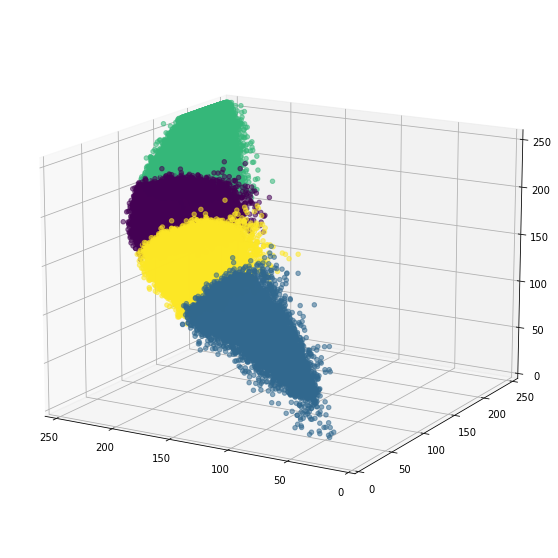

In [38]:
df_doggo['cluster'] = result.flatten()
def pixel_plotter_clusters(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, 
                    c = df['cluster'], alpha = 0.55);
    
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    
    
    ax_3d.view_init(-165, 60)
pixel_plotter_clusters(df_doggo)